# Selenium 모듈
![](https://www.selenium.dev/images/selenium_logo_large.png)
- 웹 어플리케이션 테스트를 위한 프레임 워크
    - 주로, 제작한 홈페이지 테스트 하기 위해 사용
- 다양한 언어 지원 (C++, Java, C#, 파이썬, Ruby, JavaScript, Kotlin 등..). 
- '사용자'가 아닌 '프로그램' 이 웹 브라우저를 제어할 수 있도록 지원
- 웹 브라우저마다 클라이언트 프로그램 (WebDriver) 별도 필요 
    - 웹브라우저 ↔ 프로그램 간 통신 목적
- 크롤링 보다는 웹을 제어하는 목적이 더 큼   

- 설치 > **pip instsll selenium**

- https://selenium-python.readthedocs.io/   (파이썬 ver.)

- https://www.selenium.dev/  (공식 홈)

# Web Driver 설치
- OS 및 웹 브라우저 종류, 버젼에 따라 개별 설치 해야 한다.

- 워낙 변수가 많은 관계로 실습은 크롬에서 권장합니다.

- 주요 웹드라이버 다운로드 경로
    - 크롬 : https://chromedriver.chromium.org/downloads
    - 엣지 : https://docs.microsoft.com/en-us/microsoft-edge/webdriver-chromium
    - 파이어폭스 : https://github.com/mozilla/geckodriver/releases
    

- 주의! : **다운로드 경로에 한글, 특수문자 NO!**
    - 압축 해제한 파일명은 수정하지 말기

# 크롬 드라이버 다운로드 

- 우선 크롬 버젼을 확인하고 그에 맞는 것을 선택하고 다운로드 하자
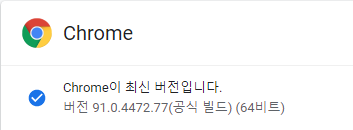
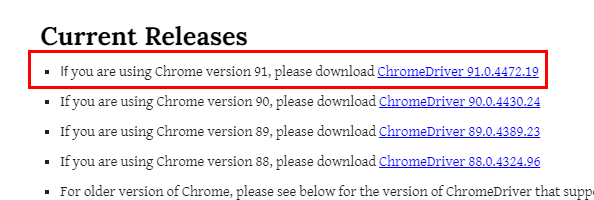
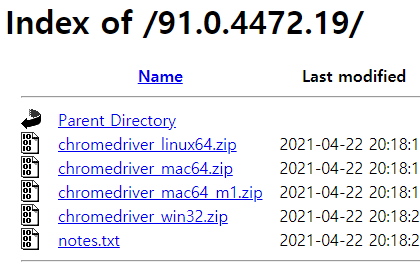

# Driver 테스트

In [1]:
from selenium import webdriver

In [80]:
driver_path = r'D:\DevRoot\DataSet\bin\chromedriver.exe'
driver = webdriver.Chrome(driver_path)  # <- 드라이버 exe가 있는 경로 명시,  없으면 현재경로로 찾음

## 주소이동 get()

In [81]:
driver.get('https://www.naver.com')

In [4]:
driver.get('https://news.naver.com')

# element 선택

|단일객체 element 리턴<br>없으면 NoSuchElementException |복수객체(element (들)의 리스트) 리턴<br>없으면 [] 리턴|
|-|-|
|find_element_by_id()||
|find_element_by_css_selector()|find_elements_by_css_selector()|
|find_element_by_class_name()|find_elements_by_class_name()|
|find_element_by_name()|find_elements_by_name()|
|find_element_by_tagname()|find_elements_by_tagname()|
|find_element_by_xpath()|find_elements_by_xpath()|
|find_element()|find_elements()|


- https://www.selenium.dev/documentation/en/webdriver/web_element/
- https://selenium-python.readthedocs.io/locating-elements.html

- 명심! 브라우저가 실행되지 전이나, 브라우저가 종료된 이후에는 세션이 끊기기 때문에 더 이상 코드 실행안됨
    - NoSuchWindowException


### element 의 속성
- .text
- .tag_name
- .get_attribute("attribue name")
- .is_enabled()
- .is_selected()
- .rect    : element 의 x, y , height, width 
- .value_of_css_property('css property')
- https://www.selenium.dev/documentation/en/webdriver/web_element/


In [8]:
driver.get('https://news.naver.com')

In [10]:
# 헤드라인 뉴스 element 선택하기
elements = driver.find_elements_by_css_selector('.hdline_article_list .hdline_article_tit a')
elements

[<selenium.webdriver.remote.webelement.WebElement (session="cce0644f0c7bcbe892fb5a756b4625cc", element="f073af2f-0f9b-46cd-83f0-9cdfc3b5ecea")>,
 <selenium.webdriver.remote.webelement.WebElement (session="cce0644f0c7bcbe892fb5a756b4625cc", element="2269492b-9ac2-4435-80d2-99a78957b844")>,
 <selenium.webdriver.remote.webelement.WebElement (session="cce0644f0c7bcbe892fb5a756b4625cc", element="83673bae-01d9-470e-a63d-3f024194d1ef")>,
 <selenium.webdriver.remote.webelement.WebElement (session="cce0644f0c7bcbe892fb5a756b4625cc", element="8b4ee3c2-5391-4b19-91d9-ee460c41be25")>,
 <selenium.webdriver.remote.webelement.WebElement (session="cce0644f0c7bcbe892fb5a756b4625cc", element="d0d7e392-1cf1-43d6-888a-2ed0afe710d9")>]

In [13]:
elements[0].text   # 텍스트 값

'인구 대국 중국도 인구 ‘발등의 불’…“세 자녀 출산 허용”'

In [14]:
elements[0].get_attribute('href')  # 특정 attribute 값.  href 는 무려 절대주소로 리턴 ㅠㅠ

'https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=104&oid=056&aid=0011054573'

In [15]:
elements[0].tag_name  # tag 이름

'a'

In [16]:
elements[0].rect  # elemene의 좌표, (h, w, x, y)

{'height': 29, 'width': 368, 'x': 335, 'y': 454.40000915527344}

In [17]:
elements[0].value_of_css_property('display')  # css property 값

'inline-block'

In [18]:
# find_elment_xxx()  <-- element 한개만 선택, 여러개인 경우 첫번째 element 만 선택
driver.find_element_by_css_selector('.hdline_article_list .hdline_article_tit a')

<selenium.webdriver.remote.webelement.WebElement (session="cce0644f0c7bcbe892fb5a756b4625cc", element="b12fe17c-5721-4193-a1d0-a31007a0b770")>

### element 가 없는 경우

In [19]:
driver.find_element_by_css_selector('.xxx')  # NoSuchElementException

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":".xxx"}
  (Session info: chrome=91.0.4472.77)


In [20]:
driver.find_elements_by_css_selector('.xxx')

[]

## 중요! Selenium 은 response 된 결과가 아닌, DOM  에서 크롤링 함.
- feat. 네이버 뉴스 이슈

In [21]:
driver.get('https://www.naver.com')

In [72]:
elements = driver.find_elements_by_css_selector('#yna_rolling .issue')
elements[0].text

'\'성희롱 경험\' 대학원생 65.5% "가해자는 교수님"'

### 스크린샷

In [73]:
driver.get_screenshot_as_png()  # 스샷을 바이너리(png) 로 읽어옴

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x045\x00\x00\x04X\x08\x06\x00\x00\x00\x11\x1a\xe8e\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00 \x00IDATx\x9c\xec\xddy\x94\\\xd7}\xe0\xf7\xef\xbd\xf7-\xb5\xf7\xde\x00\x1a\xfbB\x10$@\x12\x147\x0b\xa4H\xd1\x92\xa9]\xcaX\xb2\xe5\xd8\x92\x15\'>\x13\xdbqlg\xb5\xc7\xc9\xc99srf\x1c\'9\xf2\xf1\xcc\x19\'c\x8f=\xb6f\xbc\xc5\x1aY\xa2DI\xa46R\x94\xb8\x8a$\xb8\x80\xc4\xbe\xa3\xd1{w\xed\xf5\xb6{\xf3\xc7\xabnl\rt5\xd0h4\xc9\xfb9,\xf4R\xaf\xde\xbb\xf5\xaa\xba\xd9\xf7\xf7~\xf7\xf7\x13\xc6\x18\xc3;\x801\x86\xb3\xe3e\xa2\xc4\xe0(\x89\xa3\x04\x18\x88\xa2\x18G\tJ\xc5\x1c\x19\xdf\x05!\x90B\xdc\xe8\xe1Z\x96eY\x96eY\x96eY\xd6\xbbJ\xa5RY\xf2}:K\xbe\xc7\x1bHIA+L0\xc6 \x84\xc2U\x12\xdfw\xd1\xda05S\xc3\x18M.\xeb\xd1\xd3UDJy\xa3\x87kY\xd6\xdb\xd8\x81\xd6\x19~\xf7\xd4\x97x\xa1v\xf0F\x0f\xc5\xb2,\xcb\xb2,\xcb\xb2\xde\x16\xf6o\xfd\xe3%\xdf\xe7;jf\xef\xb9\x0eB\x18\x12\xad\t\xc3\x98 \x8a\xd1\xc6 \x04\xb8\xae\x83\xeb\xba\x84\x91\xe6\xcc\xc8$\xd33U\x82 $I\xf4\x8d\x1e\xb6eY

In [74]:
from IPython.display import Image

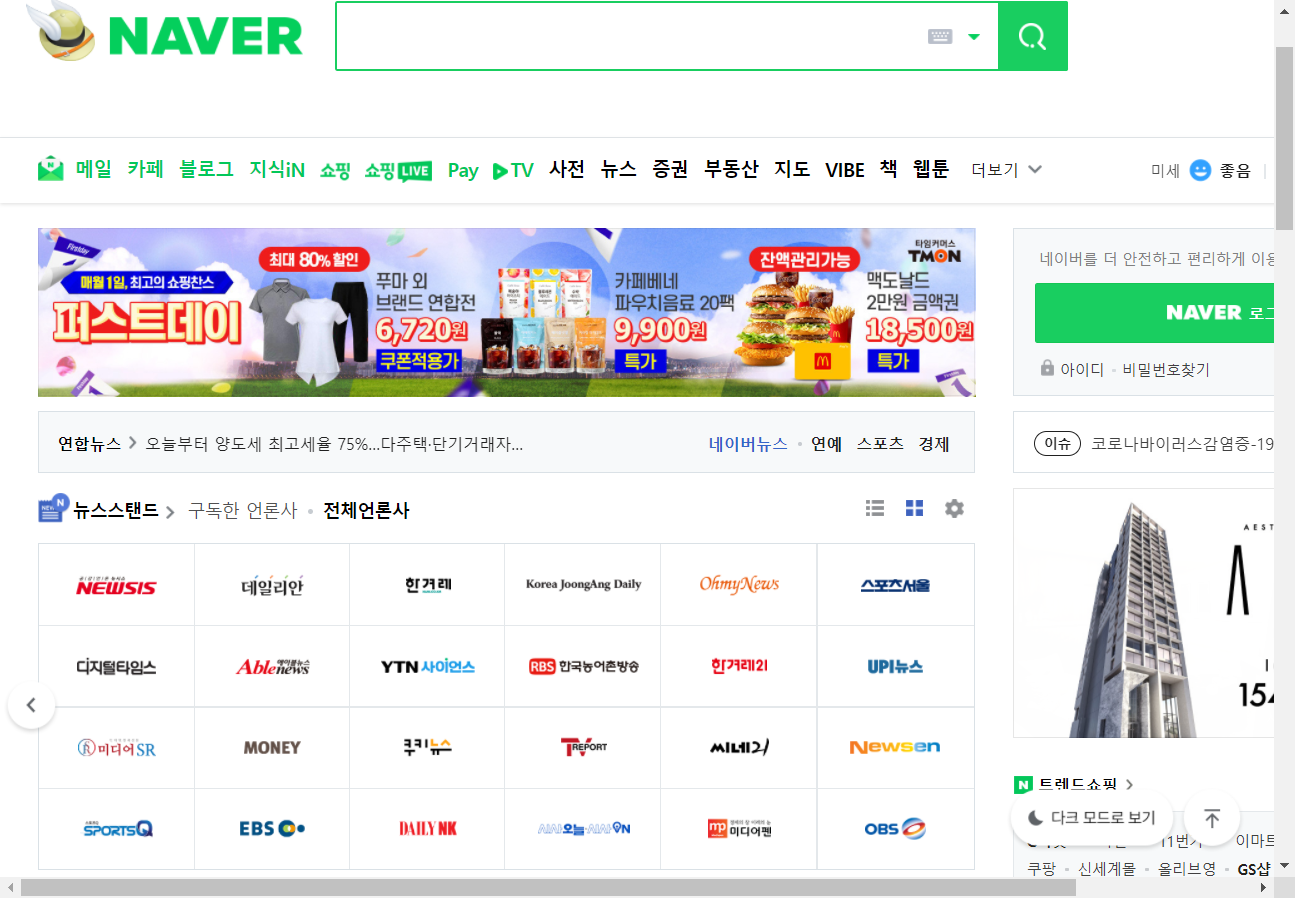

In [75]:
Image(driver.get_screenshot_as_png())

In [76]:
img_path = r'D:\DevRoot\DataSet\out\screenshot_test.png'

In [77]:
driver.get_screenshot_as_file(img_path)

True

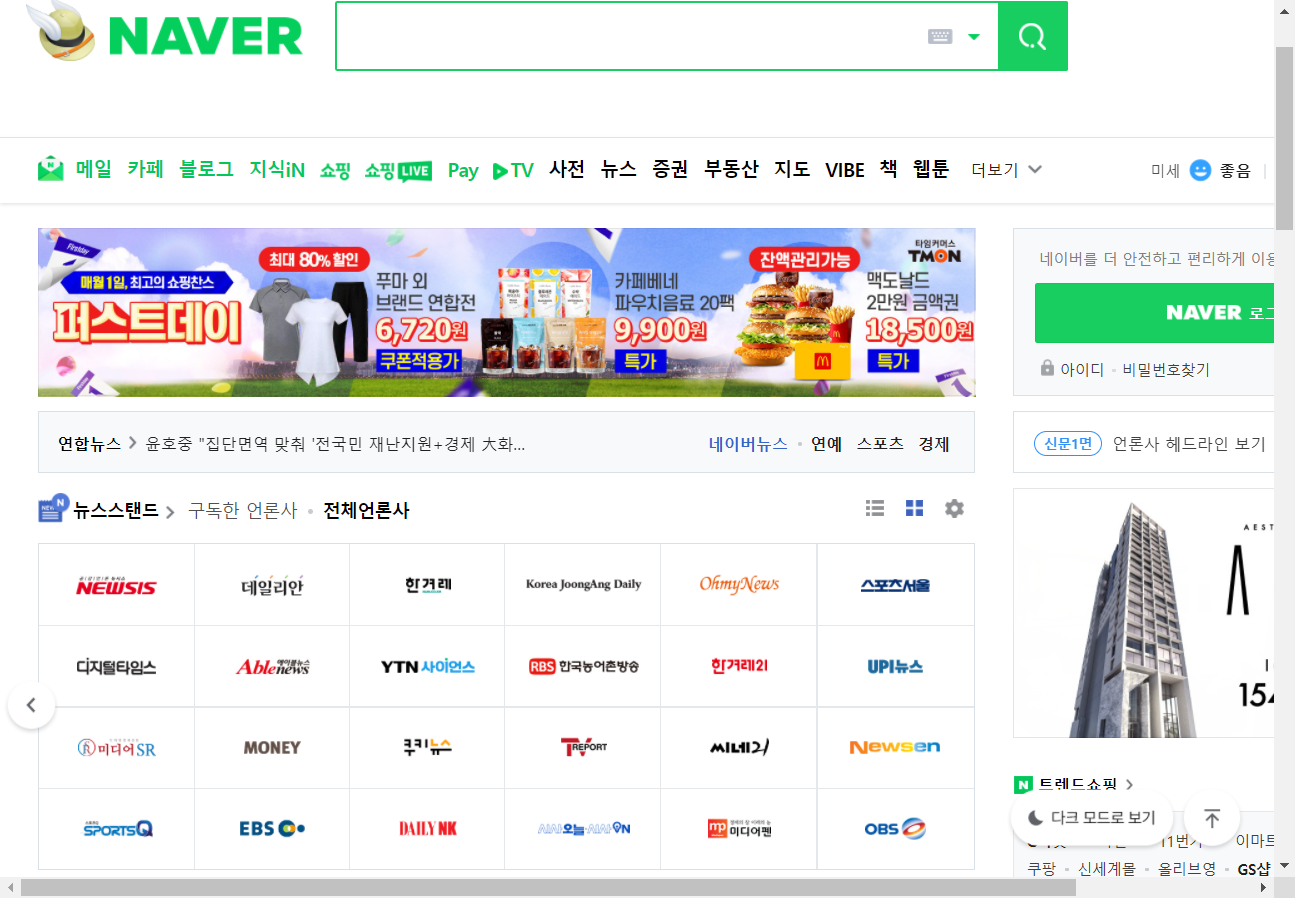

In [78]:
Image(img_path)

## By
element(들) 선택시 사용

In [79]:
from selenium.webdriver.common.by import By

In [82]:
# 네이버 로고 선택
driver.find_element_by_class_name('logo_naver')

<selenium.webdriver.remote.webelement.WebElement (session="9e292fd12e7f04a2f98e6fcb2a9c2962", element="8917f6e4-d1b5-4744-a7a8-536f4b1fece2")>

In [83]:
# find_element() 와 By.xxx 로 동일한 선택 가능
driver.find_element(By.CLASS_NAME, 'logo_naver')

<selenium.webdriver.remote.webelement.WebElement (session="9e292fd12e7f04a2f98e6fcb2a9c2962", element="8917f6e4-d1b5-4744-a7a8-536f4b1fece2")>

In [85]:
# 다음 둘은 같다
driver.find_element_by_id('yna_rolling')
driver.find_element(By.ID, 'yna_rolling')

<selenium.webdriver.remote.webelement.WebElement (session="9e292fd12e7f04a2f98e6fcb2a9c2962", element="ce3676cd-d382-494c-8e55-76586f56145c")>

In [87]:
driver.find_elements_by_tag_name('p')
driver.find_elements(By.TAG_NAME, 'p')

[<selenium.webdriver.remote.webelement.WebElement (session="9e292fd12e7f04a2f98e6fcb2a9c2962", element="526ef9c5-91ec-479f-90f0-50f079297904")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9e292fd12e7f04a2f98e6fcb2a9c2962", element="033bb596-378e-46f5-9759-ff2c2c9bfd6e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9e292fd12e7f04a2f98e6fcb2a9c2962", element="86b0d7c2-c09c-48ed-810a-d55e0e92257b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9e292fd12e7f04a2f98e6fcb2a9c2962", element="f4353913-8bac-4a60-89c5-24e45826d7f6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9e292fd12e7f04a2f98e6fcb2a9c2962", element="ce8d3a58-02ce-42ab-a1c9-c7f3fce3aff6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9e292fd12e7f04a2f98e6fcb2a9c2962", element="6bf85a95-5d7a-4bde-99c3-f129b22d0e38")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9e292fd12e7f04a2f98e6fcb2a9c2962", element="72a16e9c-19a2-4259-bcfb-34